# Author
# Md Fahim Hasan
### PhD Candidate
### Civil and Environmental Engineering
### Colorado State University

------------

## Data formats and units

__air temperature:__ deg C <br>
__T_target (IRT sensor-detected calibrated temperature):__ deg C <br>
__RH:__ % <br>
__NIR and Red bands:__ unitless <br>
__ETc:__ mm/d <br>

---------------

In [23]:
import os
from ETa_IRT import run_CWSI_ETa_model
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
run_CWSI_ETa_model(input_csv='IRT_data.csv', 
                   output_csv='CWSI_ETa_output.csv', 
                   Nir_col='R_nir', Red_col='R_red',
                   T_sensor_col='T_target', RH_col='RH', Ta_col='Air Temp',
                   ETc_col='ETc')

In [26]:
cwsi_df = pd.read_csv('CWSI_ETa_output.csv')
cwsi_df

,Time (MDT),Air Temp,RH,T_target,R_red,R_nir,ETc,NDVI,NDVI_scaled,Fr,target_emissivity,T_target_corr,VPD,VPG,dTmin,dTmax,CWSI,ETa
0,8/18/2010 14:00,34.3,14.5,29.0,0.037,0.380,6.35,0.822542,0.896723,0.804111,0.970206,29.204533,4.624488,-1.007547,-6.000241,5.094868,0.081547,5.832176
1,8/20/2010 13:00,28.6,31.8,27.7,0.036,0.390,5.59,0.830986,0.907981,0.824430,0.971221,27.885676,2.669354,-0.763399,-2.148628,4.613896,0.212096,4.404383
2,8/21/2010 13:00,29.9,34.9,28.8,0.035,0.400,6.60,0.839080,0.918774,0.844146,0.972207,28.988817,2.746431,-0.814182,-2.300470,4.713938,0.198062,5.292792
3,8/22/2010 14:00,32.4,26.0,29.1,0.034,0.400,6.10,0.843318,0.924424,0.854560,0.972728,29.287742,3.598850,-0.919813,-3.979735,4.922031,0.097450,5.505555
4,8/24/2010 14:00,24.2,36.7,24.6,0.033,0.402,5.84,0.848276,0.931034,0.866825,0.973341,24.743889,1.911613,-0.610773,-0.655878,4.313222,0.241446,4.429958
5,8/25/2010 14:00,28.4,27.9,27.2,0.032,0.405,6.10,0.853547,0.938063,0.879961,0.973998,27.363268,2.789451,-0.755827,-2.385218,4.598980,0.193077,4.922232
6,8/26/2010 14:00,32.4,16.5,29.3,0.032,0.408,6.10,0.854545,0.939394,0.882461,0.974123,29.479561,4.060865,-0.919813,-4.889904,4.922031,0.200721,4.875600
7,8/27/2010 13:00,32.9,25.4,30.7,0.035,0.408,6.10,0.841986,0.922649,0.851280,0.972564,30.902166,3.731493,-0.942257,-4.241041,4.966246,0.243634,4.613833
8,8/28/2010 14:00,31.7,22.1,30.4,0.038,0.408,5.08,0.829596,0.906129,0.821069,0.971053,30.610918,3.641638,-0.889143,-4.064027,4.861612,0.333303,3.386819
9,8/29/2010 14:00,30.3,16.0,29.8,0.040,0.408,5.59,0.821429,0.895238,0.801451,0.970073,30.012793,3.625965,-0.830365,-4.033152,4.745819,0.426695,3.204773


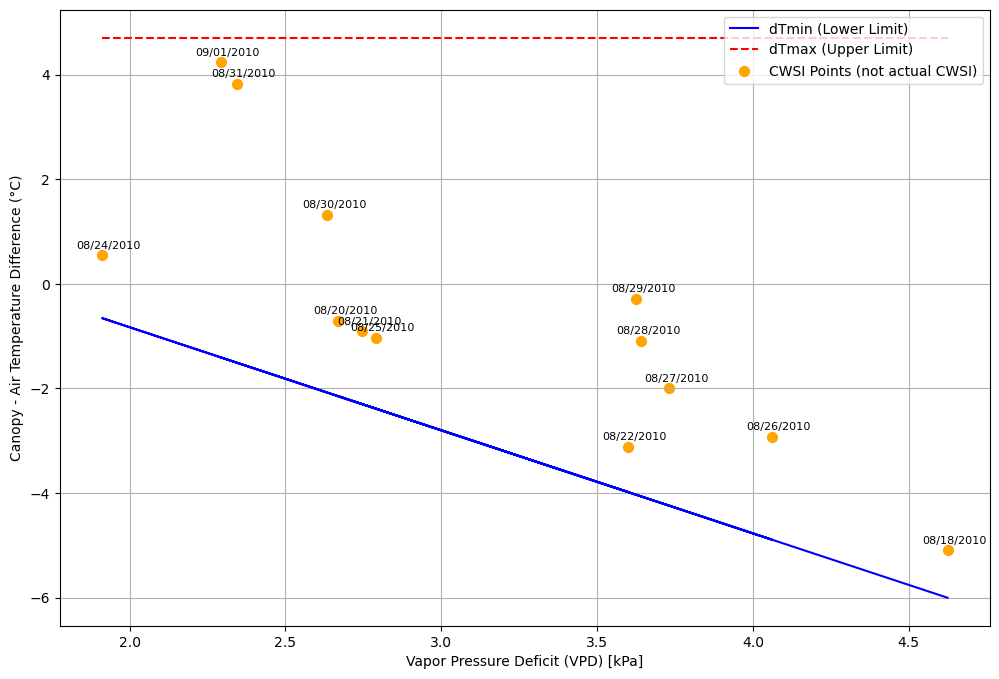

In [49]:
# Calculate temperature difference between T_target_corr and Air Temp
cwsi_df['Temp_diff'] = cwsi_df['T_target_corr'] - cwsi_df['Air Temp']

# Convert the 'Time (MDT)' column to datetime format for better handling
cwsi_df['Time (MDT)'] = pd.to_datetime(cwsi_df['Time (MDT)'])

# Start plotting
plt.figure(figsize=(12, 8))

# Plot dTmin as a declining line
plt.plot(cwsi_df['VPD'], cwsi_df['dTmin'], label='dTmin (Lower Limit)', linestyle='-', color='blue')

# Plot dTmax as a horizontal line (upper limit)
plt.hlines(y=cwsi_df['dTmax'].mean(), xmin=cwsi_df['VPD'].min(), xmax=cwsi_df['VPD'].max(), 
           label='dTmax (Upper Limit)', colors='red', linestyles='--')

# Plot temperature difference points for CWSI
plt.scatter(cwsi_df['VPD'], cwsi_df['Temp_diff'], color='orange', label='CWSI Points (not actual CWSI)', s=50)

# Annotate each point with the date
for i, row in cwsi_df.iterrows():
    plt.annotate(row['Time (MDT)'].strftime('%m/%d/%Y'), 
                 (row['VPD'], row['Temp_diff']), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center', 
                 fontsize=8, 
                 color='black')

# Labels and title
plt.xlabel('Vapor Pressure Deficit (VPD) [kPa]')
plt.ylabel('Canopy - Air Temperature Difference (°C)')
plt.legend()
plt.grid(True)

plt.show()


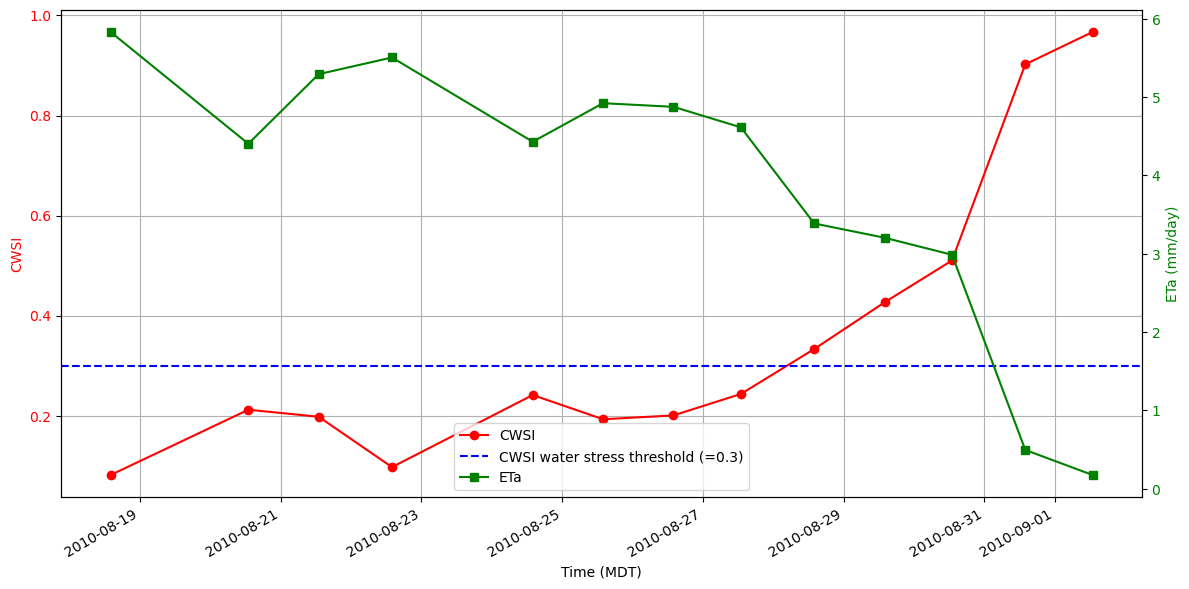

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming cwsi_df is already loaded and contains 'Time (MDT)', 'CWSI', and 'ETa' columns

# Convert the 'Time (MDT)' column to datetime format for better handling
cwsi_df['Time (MDT)'] = pd.to_datetime(cwsi_df['Time (MDT)'])

# Start plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting CWSI on the primary y-axis
line1, = ax1.plot(cwsi_df['Time (MDT)'], cwsi_df['CWSI'], linestyle='-', marker='o', color='red', label='CWSI')
line2 = ax1.axhline(0.3, linestyle='--', color='blue', label='CWSI water stress threshold (=0.3)')
ax1.set_xlabel('Time (MDT)')
ax1.set_ylabel('CWSI', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True)

# Creating the second y-axis for ETa
ax2 = ax1.twinx()
line3, = ax2.plot(cwsi_df['Time (MDT)'], cwsi_df['ETa'], linestyle='-', marker='s', color='green', label='ETa')
ax2.set_ylabel('ETa (mm/day)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# rotate x axis
fig.autofmt_xdate()

# Combine legends from both axes
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower center')

# Adjust layout and save as an image file
plt.tight_layout()
plt.savefig('CWSI_ETa.png')